In [1]:
from keras.applications.densenet import DenseNet121
from keras.layers import Input
from keras.models import Sequential, Model
from keras.layers.core import Dense
from keras.applications.mobilenet import MobileNet
import keras
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Dropout, Flatten, ZeroPadding2D
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
class_names= ['PNEUMONIA', 'NORMAL']

image_input = Input(shape=(224, 224,3))
batch_size = 32
train_path = 'data/train'
test_path = 'data/test'
valid_path = 'data/val'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), 
                                                         classes=class_names, batch_size=batch_size)


Found 5216 images belonging to 2 classes.


In [4]:
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), 
                                                         classes=class_names, 
                                                        batch_size=batch_size)


Found 624 images belonging to 2 classes.


In [5]:
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), 
                                                         classes=class_names, 
                                                        batch_size=batch_size, shuffle = False)


Found 100 images belonging to 2 classes.


In [6]:
base_model = DenseNet121(weights=None)

In [7]:
x = base_model.layers[-2].output
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [9]:
model.load_weights('weights/weights-dense121.hdf5')

In [10]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
filepath="weights_prune/weights-dense121.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

/home/sourave/.local/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [11]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
valid_labels = valid_batches.classes

In [13]:
loss = model.evaluate_generator(test_batches, steps=20, verbose=1)

20/20 [==============================] - 261s 13s/step


In [14]:
loss

[1.5025431284537683, 0.75]

In [27]:
valid_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
predictions = model.predict_generator(valid_batches, steps=4, verbose=0)

In [31]:
predictions

array([[9.9999452e-01, 5.5035161e-06],
       [9.9999893e-01, 1.0171937e-06],
       [9.9643421e-01, 3.5657636e-03],
       [9.9999821e-01, 1.7887604e-06],
       [9.9966049e-01, 3.3945433e-04],
       [9.9996817e-01, 3.1871623e-05],
       [8.6313969e-01, 1.3686024e-01],
       [9.9997675e-01, 2.3266422e-05],
       [1.0000000e+00, 5.5437386e-08],
       [9.9999022e-01, 9.7437041e-06],
       [9.9874276e-01, 1.2573220e-03],
       [9.9297899e-01, 7.0210109e-03],
       [9.9239266e-01, 7.6072984e-03],
       [9.9983764e-01, 1.6236363e-04],
       [6.9262183e-01, 3.0737823e-01],
       [9.9981254e-01, 1.8748915e-04],
       [9.6562451e-01, 3.4375448e-02],
       [9.9898559e-01, 1.0144033e-03],
       [9.8647970e-01, 1.3520250e-02],
       [9.9994612e-01, 5.3858224e-05],
       [9.9518991e-01, 4.8100422e-03],
       [9.1477716e-01, 8.5222855e-02],
       [9.9894816e-01, 1.0519160e-03],
       [9.9999070e-01, 9.2992505e-06],
       [9.9999988e-01, 1.3801845e-07],
       [9.9749583e-01, 2.

In [32]:
import sklearn
import itertools
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
%matplotlib inline

dict_characters = {0: 'Normal', 1: 'Pneumonia'}

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
print('Confusion Matrix')
fpr, tpr= confusion_matrix(valid_batches.classes, np.argmax(predictions, axis=1))
print(confusion_matrix(valid_batches.classes, np.argmax(predictions, axis=1)))
print('Classification Report')
target_names = ['Normal', 'Pneumonia']
print(classification_report(valid_batches.classes, np.argmax(predictions, axis=1), target_names=target_names))

Confusion Matrix
[[47  3]
 [38 12]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.55      0.94      0.70        50
   Pneumonia       0.80      0.24      0.37        50

   micro avg       0.59      0.59      0.59       100
   macro avg       0.68      0.59      0.53       100
weighted avg       0.68      0.59      0.53       100



In [34]:
cm = confusion_matrix(valid_labels, predictions.argmax(axis=1))

In [35]:
cm_plot_labels = ['NORMAL', 'PNEUMONIA']

In [36]:
import numpy as np

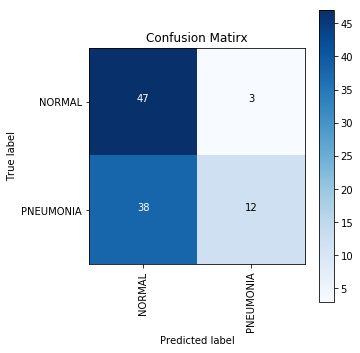

In [37]:
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matirx')

In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(valid_labels, predictions.argmax(axis=1))

In [39]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)

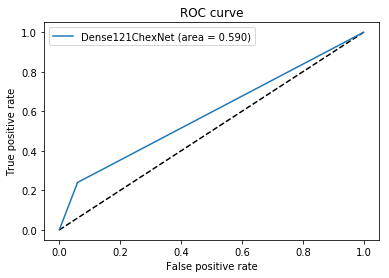

In [40]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Dense121ChexNet (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [41]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
loss = model.evaluate_generator(test_batches, steps=20, verbose=1)

20/20 [==============================] - 25s 1s/step


In [27]:
loss

[0.7360289222919024, 0.8798076938360165]

In [30]:
from kerassurgeon import identify
from kerassurgeon.operations import delete_channels

In [72]:
def prune_me(model, layer_name, val_images):
    layer = model.get_layer(name=layer_name)
    apoz = identify.get_apoz(model, layer, val_images)
    high_apoz_channels = identify.high_apoz(apoz)
    model = delete_channels(model, layer, high_apoz_channels)

    model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    loss = model.evaluate_generator(test_batches, steps=20, verbose=1)
    print('model loss after pruning: ', loss, '\n')
    print('retraining started')
    results = model.fit_generator(train_batches, steps_per_epoch=163, validation_data = test_batches, 
                    validation_steps=20, epochs=5, verbose=1, callbacks=[lr_reduce,checkpoint])
    print('retraining done')
    loss = model.evaluate_generator(test_batches, steps=20, verbose=1)
    print('model loss after retraining: ', loss, '\n')

In [ ]:
prune_me(model, 'conv5_block16_2_conv', test_batches)